# 1. Importing Datasets/Libraries

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#change wd
import os
os.chdir("C:/Users/annitan/Desktop/GA/DSIF-SG-7 - Copy/Project_2/data")

In [3]:
#importing datasets
#import train
train = pd.read_csv('train_cleaned.csv')
test = pd.read_csv('test_cleaned.csv')

# 2. Cleaning of data

## 2.1 Understanding Columns

In [4]:
# Check the shape of data set
print(f'shape of train set: {train.shape}')

shape of train set: (2043, 71)


In [5]:
# Check datatypes and numbers of non-null values; for train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2043 non-null   int64  
 1   ms_subclass      2043 non-null   int64  
 2   ms_zoning        2043 non-null   object 
 3   lot_frontage     2043 non-null   float64
 4   lot_area         2043 non-null   int64  
 5   street           2043 non-null   object 
 6   lot_shape        2043 non-null   int64  
 7   land_contour     2043 non-null   object 
 8   utilities        2043 non-null   int64  
 9   lot_config       2043 non-null   object 
 10  land_slope       2043 non-null   int64  
 11  neighborhood     2043 non-null   object 
 12  condition_1      2043 non-null   object 
 13  condition_2      2043 non-null   object 
 14  bldg_type        2043 non-null   object 
 15  house_style      2043 non-null   object 
 16  overall_qual     2043 non-null   int64  
 17  overall_cond  

In [6]:
#Drop the first column
train = train.iloc[: , 1:]

#Check X
train.head(1)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,sale_type,saleprice
0,60,RL,54.734375,13517,Pave,3,Lvl,4,CulDSac,1,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,754,0,1479,0.0,0.0,2,1,3,1,4,8,0,Attchd,1976.0,RFn,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,WD,130500


In [7]:
#Check the shape
train.shape

(2043, 70)

In [8]:
#split data columns into numerical and categorical
train_num = train.select_dtypes(exclude='object')
train_cat = train.select_dtypes(include='object')

In [9]:
#Check shape
train.shape, train_num.shape, train_cat.shape

((2043, 70), (2043, 47), (2043, 23))

In [10]:
# Check the shape of data set
print(f'shape of test set: {test.shape}')

shape of test set: (878, 70)


In [11]:
#Drop the first column
test = test.iloc[: , 1:]

#Check X
test.head(1)

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,sale_type
0,190,RM,69.0,9142,Pave,4,Lvl,4,Inside,1,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1,1,0,1,0,1020,1020,GasA,4,N,2,1020,0,1928,0,0,2,0,4,2,2,8,0,Detchd,1910.0,Unf,440,Po,Po,Y,0,60,112,0,0,0,0,4,WD


In [12]:
#split data columns into numerical and categorical
test_num = test.select_dtypes(exclude='object')
test_cat = test.select_dtypes(include='object')

test.shape, test_num.shape, test_cat.shape

((878, 69), (878, 46), (878, 23))

# 2 EDA

## 2.1 Summary Statistics

In [13]:
#split data columns into numerical and categorical
train_num = train.select_dtypes(exclude='object')
train_cat = train.select_dtypes(include='object')

In [14]:
#Check the shapes
train.shape, train_num.shape, train_cat.shape

((2043, 70), (2043, 47), (2043, 23))

In [15]:
#Put the columns into a list
list_num = list(train_num)
list_cat = list(train_cat)

In [16]:
train_cat.head(2)

,ms_zoning,street,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,foundation,heating,central_air,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,sale_type
0,RL,Pave,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,RFn,TA,TA,Y,WD


In [17]:
train_num.head(2)

,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,functional,fireplaces,garage_yr_blt,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,saleprice
0,60,54.734375,13517,3,4,1,6,8,1976,2005,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,5,5,754,0,1479,0.0,0.0,2,1,3,1,4,8,0,1976.0,475.0,0,44,0,0,0,0,0,3,130500
1,60,43.000000,11492,3,4,1,7,5,1996,1997,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,913.0,5,5,1209,0,2122,1.0,0.0,2,1,4,1,4,8,1,1997.0,559.0,0,74,0,0,0,0,0,4,220000


In [18]:
train_cat_cols = pd.get_dummies(train_cat)
train_cat_cols.head(1)

,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_N,paved_drive_P,paved_drive_Y,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [19]:
train_final = pd.concat([train_num,train_cat_cols],axis=1)
train_final.shape

(2043, 212)

In [20]:
train_final.head(2)

,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,functional,fireplaces,garage_yr_blt,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,saleprice,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_N,paved_drive_P,paved_drive_Y,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,60,54.734375,13517,3,4,1,6,8,1976,2005,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,5,5,754,0,1479,0.0,0.0,2,1,3,1,4,8,0,1976.0,475.0,0,44,0,0,0,0,0,3,130500,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,

## Test set

In [21]:
#split data columns into numerical and categorical
test_num = test.select_dtypes(exclude='object')
test_cat = test.select_dtypes(include='object')

In [22]:
#Put the columns into a list
list_num = list(test_num)
list_cat = list(test_cat)

In [23]:
#Check the shapes
test.shape, test_num.shape, test_cat.shape

((878, 69), (878, 46), (878, 23))

In [24]:
test_cat_cols = pd.get_dummies(test_cat)
test_cat_cols.head(1)

,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_Floor,heating_GasA,heating_GasW,heating_Grav,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_N,paved_drive_P,paved_drive_Y,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [25]:
test_final = pd.concat([test_num,test_cat_cols],axis=1)
test_final.shape

(878, 203)

In [26]:
#Comparing shapes
train_final.shape, test_final.shape

((2043, 212), (878, 203))

In [27]:
test_final.isnull().sum().sort_values(ascending=False)

garage_yr_blt           45
ms_subclass              0
exterior_2nd_AsbShng     0
exterior_1st_CemntBd     0
exterior_1st_HdBoard     0
exterior_1st_MetalSd     0
exterior_1st_Plywood     0
exterior_1st_PreCast     0
exterior_1st_Stucco      0
exterior_1st_VinylSd     0
exterior_1st_Wd Sdng     0
exterior_1st_WdShing     0
exterior_2nd_AsphShn     0
exterior_1st_BrkComm     0
exterior_2nd_Brk Cmn     0
exterior_2nd_BrkFace     0
exterior_2nd_CBlock      0
exterior_2nd_CmentBd     0
exterior_2nd_HdBoard     0
exterior_2nd_ImStucc     0
exterior_2nd_MetalSd     0
exterior_2nd_Other       0
exterior_2nd_Plywood     0
exterior_2nd_PreCast     0
exterior_1st_BrkFace     0
exterior_1st_AsphShn     0
exterior_2nd_VinylSd     0
roof_style_Flat          0
bldg_type_Twnhs          0
bldg_type_TwnhsE         0
house_style_1.5Fin       0
house_style_1.5Unf       0
house_style_1Story       0
house_style_2.5Fin       0
house_style_2.5Unf       0
house_style_2Story       0
house_style_SFoyer       0
h

In [28]:
train_final.isnull().sum().sort_values(ascending=False)

garage_yr_blt           114
ms_subclass               0
exterior_1st_AsbShng      0
exterior_1st_BrkComm      0
exterior_1st_BrkFace      0
exterior_1st_CBlock       0
exterior_1st_CemntBd      0
exterior_1st_HdBoard      0
exterior_1st_ImStucc      0
exterior_1st_MetalSd      0
exterior_1st_Plywood      0
exterior_1st_Stone        0
exterior_1st_Stucco       0
exterior_1st_VinylSd      0
exterior_1st_Wd Sdng      0
exterior_1st_WdShing      0
exterior_2nd_AsbShng      0
exterior_2nd_AsphShn      0
exterior_2nd_Brk Cmn      0
exterior_2nd_BrkFace      0
exterior_2nd_CBlock       0
exterior_2nd_CmentBd      0
exterior_2nd_HdBoard      0
exterior_2nd_ImStucc      0
exterior_2nd_MetalSd      0
exterior_1st_AsphShn      0
roof_matl_WdShngl         0
exterior_2nd_Stone        0
roof_matl_WdShake         0
condition_2_RRNn          0
bldg_type_1Fam            0
bldg_type_2fmCon          0
bldg_type_Duplex          0
bldg_type_Twnhs           0
bldg_type_TwnhsE          0
house_style_1.5Fin  

In [29]:
#for both dataframes, garage_yr_blt has a lot of missing values
col_to_drop = ['garage_yr_blt']

#Drop columns from train and test
train_final = train_final.drop(col_to_drop, axis=1)
test_final = test_final.drop(col_to_drop, axis=1)

In [30]:
#Comparing shapes
train_final.shape, test_final.shape

((2043, 211), (878, 202))

In [31]:
#after one hot encoding, final test set has fewer columns than train set. 
#This means that there are certain categorical features in train but not test set
#hence, we should identify these and drop them

In [32]:
#Define
X = train_final.drop('saleprice', axis=1)
y=train_final['saleprice']

In [33]:
#Comparing shapes
X.shape, test_final.shape

((2043, 210), (878, 202))

In [34]:
cols_to_drop_X = []

for col in X.columns:
    if col not in test_final.columns:
        cols_to_drop_X.append(col)
        
print(cols_to_drop_X)
print(len(cols_to_drop_X))

X = X.drop(cols_to_drop_X,axis=1)

['ms_zoning_A (agr)', 'neighborhood_GrnHill', 'neighborhood_Landmrk', 'condition_2_Artery', 'condition_2_PosN', 'condition_2_RRAe', 'condition_2_RRAn', 'condition_2_RRNn', 'roof_matl_Membran', 'exterior_1st_CBlock', 'exterior_1st_ImStucc', 'exterior_1st_Stone', 'exterior_2nd_Stone', 'heating_OthW', 'heating_Wall', 'garage_qual_Ex']
16


In [35]:
cols_to_drop_test = []

for col in test_final.columns:
    if col not in X.columns:
        cols_to_drop_test.append(col)
        
print(cols_to_drop_test)
print(len(cols_to_drop_test))

test_final = test_final.drop(cols_to_drop_test,axis=1)

['roof_matl_Metal', 'roof_matl_Roll', 'exterior_1st_PreCast', 'exterior_2nd_Other', 'exterior_2nd_PreCast', 'mas_vnr_type_CBlock', 'heating_Floor', 'sale_type_VWD']
8


In [36]:
#Comparing shapes
X.shape, test_final.shape

((2043, 194), (878, 194))

In [37]:
test_final.isnull().sum().sort_values(ascending=False)

ms_subclass             0
exterior_2nd_Stucco     0
exterior_1st_AsbShng    0
exterior_1st_AsphShn    0
exterior_1st_BrkComm    0
exterior_1st_BrkFace    0
exterior_1st_CemntBd    0
exterior_1st_HdBoard    0
exterior_1st_MetalSd    0
exterior_1st_Plywood    0
exterior_1st_Stucco     0
exterior_1st_VinylSd    0
exterior_1st_Wd Sdng    0
exterior_1st_WdShing    0
exterior_2nd_AsbShng    0
exterior_2nd_AsphShn    0
exterior_2nd_Brk Cmn    0
exterior_2nd_BrkFace    0
exterior_2nd_CBlock     0
exterior_2nd_CmentBd    0
exterior_2nd_HdBoard    0
exterior_2nd_ImStucc    0
exterior_2nd_MetalSd    0
roof_matl_WdShngl       0
roof_matl_WdShake       0
roof_matl_Tar&Grv       0
house_style_2.5Fin      0
condition_2_PosA        0
bldg_type_1Fam          0
bldg_type_2fmCon        0
bldg_type_Duplex        0
bldg_type_Twnhs         0
bldg_type_TwnhsE        0
house_style_1.5Fin      0
house_style_1.5Unf      0
house_style_1Story      0
house_style_2.5Unf      0
roof_matl_CompShg       0
house_style_

In [38]:
train_final.isnull().sum().sort_values(ascending=False)

ms_subclass             0
exterior_2nd_Stone      0
exterior_1st_AsphShn    0
exterior_1st_BrkComm    0
exterior_1st_BrkFace    0
exterior_1st_CBlock     0
exterior_1st_CemntBd    0
exterior_1st_HdBoard    0
exterior_1st_ImStucc    0
exterior_1st_MetalSd    0
exterior_1st_Plywood    0
exterior_1st_Stone      0
exterior_1st_Stucco     0
exterior_1st_VinylSd    0
exterior_1st_Wd Sdng    0
exterior_1st_WdShing    0
exterior_2nd_AsbShng    0
exterior_2nd_AsphShn    0
exterior_2nd_Brk Cmn    0
exterior_2nd_BrkFace    0
exterior_2nd_CBlock     0
exterior_2nd_CmentBd    0
exterior_2nd_HdBoard    0
exterior_2nd_ImStucc    0
exterior_2nd_MetalSd    0
exterior_1st_AsbShng    0
roof_matl_WdShngl       0
roof_matl_WdShake       0
house_style_2.5Unf      0
condition_2_RRNn        0
bldg_type_1Fam          0
bldg_type_2fmCon        0
bldg_type_Duplex        0
bldg_type_Twnhs         0
bldg_type_TwnhsE        0
house_style_1.5Fin      0
house_style_1.5Unf      0
house_style_1Story      0
house_style_

In [39]:
# train-test-split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# scale the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# import performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Modelling

## Linear Regression

In [57]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
scores = cross_validate(lr,
                        X_train_scaled,
                        y_train,scoring=['r2','neg_mean_absolute_error',
                                'neg_mean_squared_error'],
                        cv=5)
scores = pd.DataFrame(scores)
scores.mean()

fit_time                        8.073187e-03
score_time                      5.980492e-04
test_r2                         8.903959e-01
test_neg_mean_absolute_error   -1.744446e+04
test_neg_mean_squared_error    -6.249149e+08
dtype: float64

- r2_score negative and low. Model does not predict well.
- Large RMSE. Model is a poor fit.

## Lasso Regression

In [55]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(eps=0.001,n_alphas=100,cv=5,max_iter=1_000_000)
lasso_cv.fit(X_train_scaled,y_train)
lasso_cv_pred = lasso_cv.predict(X_test_scaled)

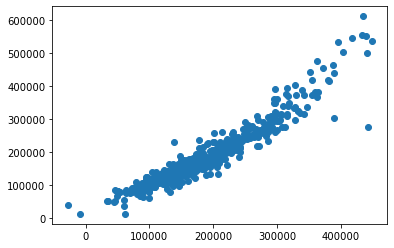

In [56]:
#Visualize the relationship between predicted and y_test
plt.scatter(lasso_cv_pred, y_test)

In [42]:
print(f'mean_absolute_error: {round(mean_absolute_error(y_test,lasso_cv_pred), 1)}')
print(f'root_mean_absolute_error: {round(np.sqrt(mean_squared_error(y_test,lasso_cv_pred)), 1)}')
print(f'r2_score: {round((r2_score(y_test,lasso_cv_pred)), 3)}')
print(f'lasso_cv alpha: {round(((lasso_cv.alpha_)), 2)}')

mean_absolute_error: 18001.7
root_mean_absolute_error: 27343.7
r2_score: 0.897
lasso_cv alpha: 604.03


- r2_score is better in Lasso (compared to Linear Regression)

In [43]:
#Check Lasso Coefficients
lasso_cv.coef_

array([-4.35344035e+03,  5.81525187e+02,  5.05322971e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.04600877e+04,  3.71753857e+03,
        1.06131030e+04,  6.31873781e+02,  3.81876655e+03,  1.23688398e+04,
       -0.00000000e+00,  1.74322993e+03, -1.69789169e+03,  4.21250566e+03,
        0.00000000e+00,  1.26474569e+04, -0.00000000e+00, -6.63797703e-01,
       -0.00000000e+00,  8.38317379e+03,  5.86418266e+02, -0.00000000e+00,
        0.00000000e+00, -3.70965586e+01,  3.15128220e+04,  1.94552163e+03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.16680812e+03,
       -0.00000000e+00,  8.14971350e+03,  4.32752455e+03,  4.82362705e+03,
        5.75170019e+03,  6.64607187e+02,  0.00000000e+00, -9.17667837e-01,
        1.57487090e+01,  5.28691113e+01, -5.04502525e+00, -3.42837372e-01,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

## Ridge Regression

In [53]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=(0.1,1,5,10,50,100,1000),scoring='neg_root_mean_squared_error')
ridge_cv.fit(X_train_scaled,y_train)
ridge_cv_pred = ridge_cv.predict(X_test_scaled)

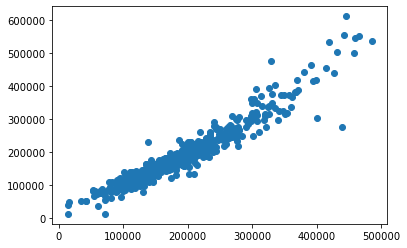

In [54]:
#Visualize the relationship between predicted and y_test
plt.scatter(ridge_cv_pred, y_test)

In [45]:
print(f'mean_absolute_error: {round((mean_absolute_error(y_test,ridge_cv_pred)), 1)}')
print(f'root_mean_absolute_error: {round((np.sqrt(mean_squared_error(y_test,ridge_cv_pred))), 1)}')
print(f'r2_score: {round((r2_score(y_test,ridge_cv_pred)), 3)}')
print(f'ridge_cv alpha: {round(((ridge_cv.alpha_)), 2)}')

mean_absolute_error: 16417.2
root_mean_absolute_error: 24900.0
r2_score: 0.915
ridge_cv alpha: 10.0


In [46]:
#Check Ridge Coefficients
ridge_cv.coef_

array([-5.14024361e+03,  1.52501088e+03,  5.59383245e+03,  2.16144580e+03,
        3.52442459e+03, -8.54025634e+02,  1.60340684e+04,  5.41348173e+03,
        1.25295859e+04,  2.15172238e+03,  3.80471718e+03,  8.96096365e+03,
       -1.42576582e+03,  2.03361373e+03, -4.63963307e+03,  4.37624812e+03,
        1.37597536e+03,  9.81318598e+03,  1.12491888e+03, -7.93140533e+00,
       -1.96788742e+03,  1.15566865e+04,  2.40213001e+03, -1.08860747e+03,
        3.95432044e+02, -3.12582237e+01,  2.82638713e+04,  4.23745010e+03,
       -4.89695440e+02,  2.73592202e+03,  2.51096265e+03, -2.80341924e+03,
       -7.00402930e+03,  5.73678008e+03,  5.77781152e+03,  4.82742769e+03,
        6.40603464e+03,  1.52330205e+03,  2.33414351e+02, -1.14913748e-01,
       -3.37660792e+01,  4.84066520e+01,  3.08983420e+00,  1.72490603e+00,
       -9.91726750e+01, -7.13464551e+03,  2.44950311e+03,  1.03926920e+03,
        3.32998936e+03,  2.52806504e+03, -2.76549646e+03, -2.82409466e+03,
        2.82409466e+03, -

Conclusion:
- Out of Linear Regression, Lasso and Ridge, Ridge is the best model to be used.
    - It has the highest Rsquare (0.915) and lowest RMSE (24900.0).
- We would use Ridge Model

# Identifying the 10 features with the highest coefficients from the Ridge regression model

In [47]:
top10 = pd.DataFrame(X.columns,columns=['feature'])

In [48]:
top10['coef'] = ridge_cv.coef_

In [64]:
top10_features = top10.sort_values(by='coef',ascending=False).head(10)

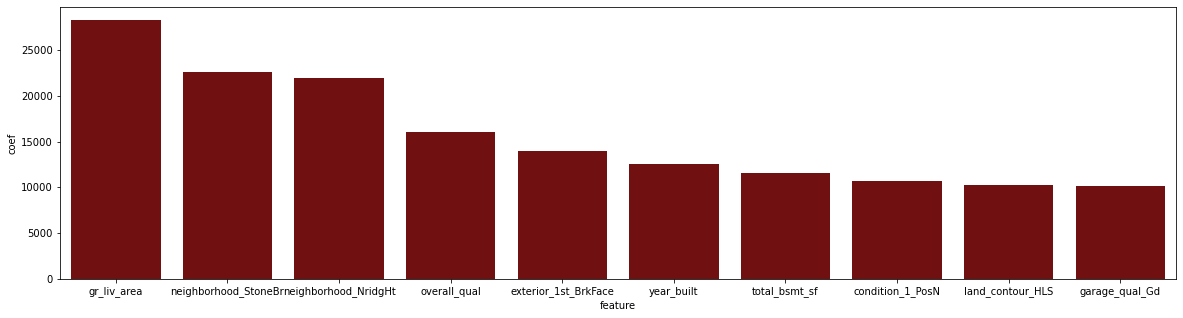

In [68]:
fig = plt.figure(figsize = (20, 5))
sns.barplot(x = 'feature',y = 'coef',data = top10_features, color ='maroon')
plt.show()

In [50]:
# viewing the 10 features with the highest positive coefficients
top10.sort_values(by='coef',ascending=False).head(10)

,feature,coef
26,gr_liv_area,28263.871326
85,neighborhood_StoneBr,22585.339752
79,neighborhood_NridgHt,21927.939059
6,overall_qual,16034.068450
126,exterior_1st_BrkFace,13996.772863
8,year_built,12529.585894
21,total_bsmt_sf,11556.686463
92,condition_1_PosN,10733.989735
54,land_contour_HLS,10274.034374
174,garage_qual_Gd,10177.460750


In [60]:
# viewing the 10 features with the highest negative coefficients
top10.sort_values(by='coef',ascending=False).tail(10)

,feature,coef
45,ms_zoning_C (all),-7134.645512
77,neighborhood_NWAmes,-7447.899266
88,condition_1_Artery,-7598.496644
176,garage_qual_TA,-7607.950064
67,neighborhood_CollgCr,-8449.340964
83,neighborhood_SawyerW,-8840.947331
70,neighborhood_Gilbert,-9232.093887
185,sale_type_COD,-9543.284024
69,neighborhood_Edwards,-9548.504447
117,roof_style_Mansard,-9975.944202


In [70]:
bottom10_features = top10.sort_values(by='coef',ascending=False).tail(10)

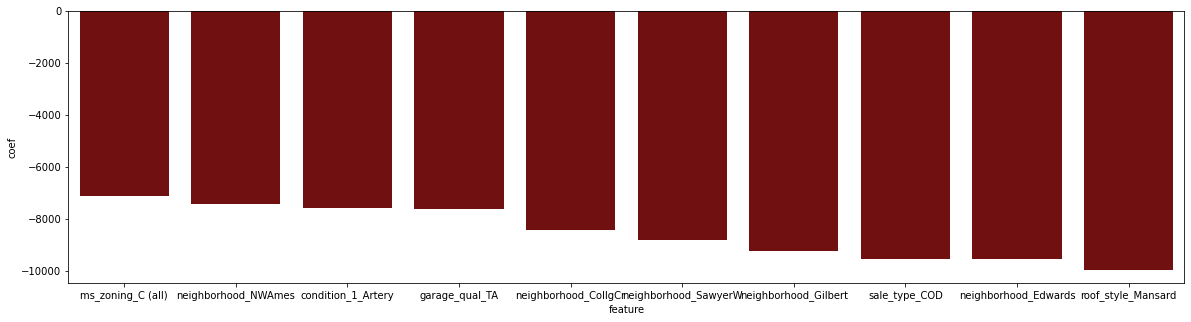

In [73]:
fig = plt.figure(figsize = (20, 5))
sns.barplot(x = 'feature',y = 'coef',data = bottom10_features, color ='maroon')
plt.show()

# Conclusion

Using the Ridge Regression Models, we could identify the top 10 features that have positive and negative impact on Sale Price.

These features that are identified would be able to help the students make decisions on which are the ones that are critical and how they affect the Sale Price. 

For example, gr_liv_area (Above Ground Living Area) affects Sale Price greatly. Holding everything else constant, every unit increase in Above Ground Living Area, increases Sale Price by 28263.87. A student would have to consider if Above Ground Living Area is critical enough for them to pay this much. 

Similarly, a student with tight budget might want to choose to stay in Edwards as it affects Sale Price negatively (holding all other features constant).


# Kaggle Submission

In [ ]:
test_final.shape

In [ ]:
# scale the final test dataset named as df2_final
test_final_scaled = scaler.fit_transform(test_final)

In [ ]:
# predict sale prices based on the LassoCV model from above
SalePrice = ridge_cv.predict(test_final_scaled)

In [ ]:
SalePrice

In [ ]:
test_final_scaled.shape, SalePrice.shape

In [ ]:
import os
os.chdir("C:/Users/annitan/Desktop/GA/DSIF-SG-7 - Copy/Project_2/datasets")
test = pd.read_csv('test.csv')
test.columns = test.columns.str.lower().str.replace(' ', '_')
test.shape

In [ ]:
submission = pd.DataFrame(test['id'])

In [ ]:
submission.shape, SalePrice.shape

In [ ]:
submission['SalePrice'] = SalePrice

In [ ]:
# add in a new column with the predictions
submission['SalePrice'] = SalePrice

In [ ]:
# set the index as the ID to match the requirement for kaggle submission
submission = submission.set_index('id')

In [ ]:
submission.shape, test.shape

In [ ]:
submission.shape, test.shape

In [ ]:
# check
submission

In [ ]:
# save the submission as a csv file
import os
os.chdir("C:/Users/annitan/Desktop/GA/DSIF-SG-7 - Copy/Project_2/data")
submission.to_csv('submission.csv')

- Score: 29439.64219
- Private score: 23153.09764